In [1]:
import pandas as pd
import sys
import os
if not sys.modules.get('pyarrow'):
    os.system('pip3 install pyarrow')
import numpy as np
from glob import glob
import datetime 
from dateutil.relativedelta import relativedelta
from collections import Counter
import numpy as np
from sklearn import metrics
import numpy as np
import operator


In [2]:
def month_vouch(m):
    if len(str(m))==1:
        return '0'+str(m)
    else:
        return str(m)

In [3]:
def pearson_cor(a,b):   
    if a.shape != b.shape:
        print('크기가 다른 데이터입니다.')            
    else:
        return((np.dot(a,b) - np.mean(a)*np.mean(b)*a.shape[0])/(a.shape[0]-1))/(np.std(a)*np.std(b))

In [4]:
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
# 한글처리
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Windows': # 윈도우
    # 폰트 차후 확인
    fontPath = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family=fontName )
else:
    print('알수없는 시스템. 미적용')

In [5]:
from sklearn.linear_model import LogisticRegression
if not sys.modules.get('xgboost'):
    os.system('pip3 install xgboost')
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split

In [6]:
stock_code = '015760'
path = './data/freq2/naver_{0}_freq.parquet/'.format(stock_code)
file_name = os.listdir(path)[0]
data = pd.read_parquet(path+file_name)
#data['date'] = pd.to_datetime(data['date'], format='%Y.%m.%d', errors='ignore')
tag_dict= Counter()
all_dict = Counter()

In [7]:
data_sorting = data.sort_values(by='date')
data_sorting.reset_index(inplace=True,drop=True)

In [8]:
# for columns in data_sorting.columns:
#     if columns.find('기도')>=0:
#         print(columns)

# 고려해야할 것
- 각 컬럼의 총 빈도를 계산하여 특정 빈도 이하는 제거
- 날짜 짝짓기
- 전날과 당일 빈도 묶기 - 주말,휴일 고려 

In [9]:
#특정 이하 빈도 제거 
sum_by_columns = data_sorting.drop(columns=['date']).sum(axis=0)
abs_path = os.path.abspath('../file_list/crawl_data/naver_{0}.csv'.format(stock_code))
csv_file = pd.read_csv(abs_path,header=None)
#print(csv_file.head(10))
filter_size = csv_file.shape[0]*0.02
filtered_index_series = sum_by_columns>filter_size
filtered_index = filtered_index_series[filtered_index_series==True].keys()
#date_list = ['date']
#data['date'].concat(sum_by_columns>filter_size)

#data_filter_freq = data_sorting.loc[:date_list.extend(filtered_index)]
data_filter_freq = data_sorting.loc[:,filtered_index]
# 수익률과 날짜를 맞춰주기 위해서 하루를 미뤄준다.

#day를 더해줬던 이유가 무엇일까?
data_filter_freq.index = data_sorting['date'].apply(lambda x:datetime.datetime(int(x.split('.')[0]),int(x.split('.')[1]),int(x.split('.')[2]))+relativedelta(days=1))
data_filter_freq = data_filter_freq.loc[:datetime.datetime(2018,11,30)]

In [10]:
# for columns in data_filter_freq.columns:
#     if columns.find('김가')>=0:
#         print(columns)

In [11]:
data_filter_freq.tail()

,!!/sf,!/sf,%/sw,&/sw,..../se,.../se,../se,./se,./sf,0/sn,...,하락/nng,한/mm,한/nnp,한국/nnp,한국전력/nnp,한전/nnp,현재/mag,홈오홈마니/nng,회사/nng,후/nng
date,,,,,,,,,,,,,,,,,,,,,
2018-11-26,0,1,20,0,0,3,2,2,92,1,...,1,5,1,0,1,0,3,0,0,1
2018-11-27,15,26,19,0,7,7,12,8,163,2,...,9,5,3,5,6,14,1,0,2,1
2018-11-28,2,11,3,0,4,5,12,7,84,1,...,1,2,0,2,2,14,1,0,1,1
2018-11-29,22,40,22,18,5,13,8,15,238,1,...,8,10,8,18,12,35,3,0,4,3
2018-11-30,2,5,12,0,0,5,2,6,209,0,...,3,4,5,28,4,19,5,0,3,1


In [12]:
data_filter_freq_ori = data_filter_freq

In [13]:
#### 보류
#날짜 짝짓기
#첫행 처리는 어떻게 할것인가? 없으면 더해주지 않는다. 있으면 더한다. 

In [14]:
# 7월 30일 데이터는 없다.
#data_filter_freq.loc[datetime.datetime(year=2017,month=7,day=30),:]

In [15]:
# ### 수익률 데이터 처리
# earning_month_raw = pd.read_excel('./data/코웨이수익률.xlsx')
# earning_month_raw.index = earning_month_raw['date']
# del earning_month_raw['date']
# earning_data = earning_month_raw.loc[datetime.datetime(year=2017,month=6,day=8):datetime.datetime(year=2018,month=11,day=30),'return']
# # 해당 열 추출
# # symbol = earning_month_raw.loc[:,'A'+stock_code]
# # return_data =symbol
# # earning_data = return_data[datetime.datetime(year=2017,month=6,day=8):datetime.datetime(year=2018,month=11,day=30)]
# #earning_data = earning_month_raw[datetime.datetime(year=2017,month=6,day=8):datetime.datetime(year=2018,month=11,day=30)]

In [16]:
## 수익률 데이터 처리
stock_code = '015760'
earning_month_raw = pd.read_excel('./data/현대차,한전_수익률.xlsx')
# 해당 열 추출
symbol = earning_month_raw.loc[:,'A'+stock_code]
return_data =symbol

earning_data = return_data[datetime.datetime(year=2017,month=6,day=8):datetime.datetime(year=2018,month=11,day=30)]


In [17]:
# ### 수익률 데이터 처리
# earning_month_raw = pd.read_excel('./data/일일수익률.xlsx')

# symbol = earning_month_raw.loc['Symbol Name':,:]
# symbol.columns = earning_month_raw.loc['Symbol']

# # 해당 열 추출
# return_data = symbol['A'+stock_code]


# earning_data = return_data[datetime.datetime(year=2017,month=6,day=8):datetime.datetime(year=2018,month=11,day=30)]


In [18]:
earning_data.head()

2017-06-08    1.40
2017-06-09    0.11
2017-06-12    0.80
2017-06-13   -0.80
2017-06-14   -1.83
Name: A015760, dtype: float64

In [19]:
len(earning_data)

363

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
earning_data_ori = earning_data

In [22]:
len(earning_data_ori)

363

1.6372378759209891


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


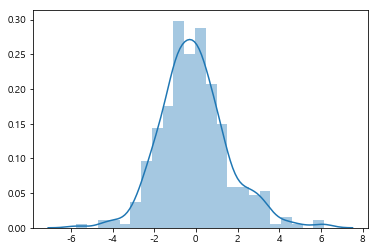

In [23]:
sns.distplot(list(earning_data))
print(earning_data.std())

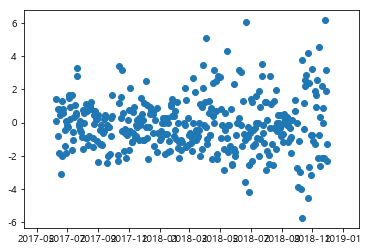

In [24]:
plt.scatter(earning_data.index,earning_data) #일일 변화율은 안정적인 편이다.

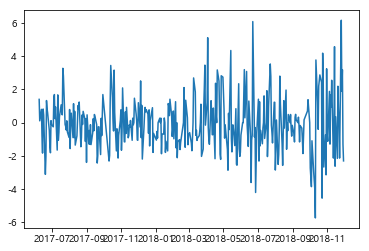

In [25]:
plt.plot(earning_data)

In [26]:
# earning_data의 전날 텍스트 빈도와 earning_data의 수익률의 짝을 맞춰야한다. 
# 주말과 휴일을 고려해야한다.
# 합치기 위해서는 earning_data의 index 정보가 필요하다.

#earning_data.index =  [date- relativedelta(days=1) for date in earning_data.index]

In [27]:
earning_data.tail()

2018-11-26    6.16
2018-11-27    1.88
2018-11-28    3.18
2018-11-29   -1.30
2018-11-30   -2.30
Name: A015760, dtype: float64

In [28]:
# 이 날짜에 있는 빈도를 수익률과 상관계수를 구할거임
data_filter_freq.index 

DatetimeIndex(['2017-06-08', '2017-06-09', '2017-06-10', '2017-06-11',
               '2017-06-12', '2017-06-13', '2017-06-14', '2017-06-15',
               '2017-06-16', '2017-06-17',
               ...
               '2018-11-21', '2018-11-22', '2018-11-23', '2018-11-24',
               '2018-11-25', '2018-11-26', '2018-11-27', '2018-11-28',
               '2018-11-29', '2018-11-30'],
              dtype='datetime64[ns]', name='date', length=541, freq=None)

In [29]:
# print(differ_date[:10])

In [30]:
# a = differ_date[0:2]
# a.append('babo')

In [31]:
# differ_date

In [32]:
data_filter_freq.shape

(541, 223)

In [33]:
########### 안되는 이유: 컬럼 갯수가 계속해서 줄어 들기 때문에 idx가 줄어든 갯수를 넘어가면 out of index bound 에러가 난다.
# for idx in range(data_filter_freq.shape[1]):
#     print(idx)
#     tag = data_filter_freq.iloc[:,idx]    
#     tag_name = tag.name
#     print(tag_name)
#     #print(data_filter_freq.columns)
#     if tag_name == './sf'or tag_name.find('/sw')>=0 or tag_name.find('/sn')>=0:
#         #del data_filter_freq.iloc[:,idx]
#         data_filter_freq.drop(columns=tag_name,inplace=True,axis=1)

In [34]:
#필요 없다고 생각되는 태그 제거

delete_column_list = []
for idx in range(data_filter_freq.shape[1]):
    
    tag = data_filter_freq.iloc[:,idx]    
    tag_name = tag.name    
    
    if tag_name == './sf'or tag_name.find('/sw')>=0 or tag_name.find('/sn')>=0:
        delete_column_list.append(tag_name)
        
data_filter_freq.drop(columns=delete_column_list,inplace=True,axis=1)
    
    
    
    
    
    



In [35]:
differ_date = sorted(list(set(data_filter_freq.index).difference(set(earning_data.index))))
#print(differ_date)
i = 0
for idx in range(len(differ_date)-1):
    #print(element)
    # 10 11 17 idx = 1
    if (differ_date[idx+1]-differ_date[idx]).days > 1:      
        #print(differ_date[i],differ_date[idx+1],data_filter_freq.loc[differ_date[i:idx+1],:].sum())
        # 휴일 or 주말이 끼면 그 날을 포함해서 다음 날에 반영한다.
        # 휴일 다음날 
        append_idx = differ_date[idx]+relativedelta(days=1)
        sum_list = differ_date[i:idx+1]
        sum_list.append(append_idx)
        data_filter_freq.loc[append_idx,:] = data_filter_freq.loc[sum_list,:].sum()//len(sum_list)
        data_filter_freq.drop(index = differ_date[i:idx+1],inplace=True)
        #del data_filter_freq.loc[differ_date[i:idx+1],:]
        #print(sum_list,'append_idx:',append_idx)
        i = idx+1

In [36]:
print(len(data_filter_freq),len(earning_data))

365 363


In [37]:
differ_date1 = sorted(list(set(data_filter_freq.index).difference(set(earning_data.index))))

In [38]:
differ_date1

[Timestamp('2018-11-24 00:00:00'), Timestamp('2018-11-25 00:00:00')]

In [39]:
data_filter_freq.drop(differ_date1,inplace=True,axis=0)

In [40]:
differ_date2 = sorted(list(set(earning_data.index).difference(set(data_filter_freq.index))))

In [41]:
differ_date2

[]

In [42]:
earning_data.drop(differ_date2, inplace=True, axis=0)

In [43]:
print(len(data_filter_freq),len(earning_data))

363 363


In [44]:
data_filter_freq

,!!/sf,!/sf,..../se,.../se,../se,./se,?/sf,??/sf,ㄴ/jx,ㅋ/ic,...,하락/nng,한/mm,한/nnp,한국/nnp,한국전력/nnp,한전/nnp,현재/mag,홈오홈마니/nng,회사/nng,후/nng
date,,,,,,,,,,,,,,,,,,,,,
2017-06-08,1,2,1,7,8,6,7,1,1,6,...,0,2,1,0,2,7,0,0,0,1
2017-06-09,1,5,6,4,6,3,9,0,4,2,...,1,4,2,1,1,8,1,0,1,0
2017-06-12,1,4,2,3,8,4,15,1,3,1,...,0,2,1,0,1,6,0,0,2,1
2017-06-13,2,2,10,14,13,7,15,0,5,1,...,5,0,0,1,1,10,0,0,0,0
2017-06-14,1,3,7,5,8,1,5,0,1,1,...,1,2,1,0,2,4,0,0,3,0
2017-06-15,5,9,7,37,31,13,35,1,3,4,...,6,7,4,4,0,16,0,0,2,3
2017-06-16,1,20,3,10,12,6,14,0,6,2,...,5,3,1,0,2,8,0,0,0,1
2017-06-19,0,4,1,3,3,1,9,0,4,1,...,2,0,0,0,1,4,0,0,1,0
2017-06-20,2,19,5,26,27,22,75,2,25,8,...,1,11,6,4,4,36,1,0,2,1


### 감성 사전을 크게 두가지로 만들 것이다.
1. 분모를 해당 형태소 빈도 
2. 분모를 긍정글의 갯수/ 부정글의 갯수

1. 분모를 해당 형태소 빈도

In [45]:
data_filter_freq_copy = data_filter_freq
plus_dataframe1 = pd.DataFrame(columns=data_filter_freq_copy.columns)
minus_dataframe1 = pd.DataFrame(columns=data_filter_freq_copy.columns)
plus_dict1 = pd.Series([])
minus_dict1 = pd.Series([])

In [46]:
idx = 0
for idx in range(data_filter_freq.shape[0]):    
    #print(idx)
    if earning_data.iloc[idx]==1:
        #print('data_filter_freq_copy.iloc[idx,:]* 1:',data_filter_freq_copy.iloc[idx,:]* 1)
        plus_dataframe1= plus_dataframe1.append(data_filter_freq_copy.iloc[idx,:]* 1)   
        
    elif earning_data.iloc[idx]==0:
        minus_dataframe1 = minus_dataframe1.append(data_filter_freq_copy.iloc[idx,:]* -1)
    idx+=1

In [47]:
sum_plus1 = plus_dataframe1.sum(axis=0)
sum_filter_freq = data_filter_freq_copy.sum(axis=0)
for idx in range(len(sum_plus1)):
    plus_dict1 = plus_dict1.append(pd.Series(sum_plus1[idx]/sum_filter_freq[idx],index=[sum_plus1.index[idx]]))    

In [48]:
plus_dict1.head()

!!/sf      0.001952
!/sf       0.004488
..../se    0.001099
.../se     0.004599
../se      0.004150
dtype: float64

In [49]:
sum_minus1 = minus_dataframe1.sum(axis=0)
sum_filter_freq = data_filter_freq_copy.sum(axis=0)
for idx in range(len(sum_minus1)):
    minus_dict1 = minus_dict1.append(pd.Series(sum_minus1[idx]/sum_filter_freq[idx],index=[sum_minus1.index[idx]]))

In [50]:
minus_dict1.head()

!!/sf     -0.050748
!/sf      -0.054910
..../se   -0.054945
.../se    -0.044350
../se     -0.054215
dtype: float64

In [51]:
sentimental_score1 = (plus_dict1.sort_values(ascending=False)+ minus_dict1.sort_values(ascending=False)).sort_values(ascending=False)

In [52]:
sentimental_score1

ㅋ/mag       -0.021645
오늘/nng      -0.022562
수익/nng      -0.025271
석탄/nng      -0.025281
공매/nng      -0.026794
ㅋ/nng       -0.027699
상승/nng      -0.029240
개/nnb       -0.030395
나/vv        -0.033263
개인/nng      -0.033613
듯/nnb       -0.033920
신/xpn       -0.033951
??/sf       -0.034341
팔/vv        -0.034687
매수/nng      -0.034917
좀/mag       -0.035623
이익/nng      -0.035874
놈/nnb       -0.037500
종목/nng      -0.037705
주주/nng      -0.037838
거/nnb       -0.038224
개미/nng      -0.038961
문재앙/nnp     -0.039080
번/nnb       -0.039521
.../se      -0.039750
이렇/va       -0.039861
기/nng       -0.039926
가/vv        -0.040013
좋/va        -0.040387
배당/nng      -0.040698
               ...   
이/nng       -0.068293
정책/nng      -0.068901
아직/mag      -0.069024
태양광/nng     -0.069482
지나/vv       -0.069519
안/nng       -0.070205
하락/nng      -0.070524
문재/nng      -0.070767
위하/vv       -0.071210
대한민국/nnp    -0.071719
공기업/nng     -0.071782
전/mm        -0.072059
정부/nng      -0.072384
나라/nng      -0.072774
결국/nng    

2. 분모를 긍정글의 갯수/ 부정글의 갯수

In [53]:
data_filter_freq_copy = data_filter_freq
plus_dataframe2 = pd.DataFrame(columns=data_filter_freq_copy.columns)
minus_dataframe2 = pd.DataFrame(columns=data_filter_freq_copy.columns)

In [54]:
data_filter_freq_copy = data_filter_freq
plus_dataframe2 = pd.DataFrame(columns=data_filter_freq_copy.columns)
minus_dataframe2 = pd.DataFrame(columns=data_filter_freq_copy.columns)

In [55]:
idx = 0
for idx in range(data_filter_freq.shape[0]):    
    #print(idx)
    if earning_data.iloc[idx]==1:
        #print('data_filter_freq_copy.iloc[idx,:]* 1:',data_filter_freq_copy.iloc[idx,:]* 1)
        plus_dataframe2= plus_dataframe1.append(data_filter_freq_copy.iloc[idx,:]* 1)   
        
    elif earning_data.iloc[idx]==0:
        minus_dataframe2 = minus_dataframe1.append(data_filter_freq_copy.iloc[idx,:]* -1)
    idx+=1

In [56]:
minus_dict2=minus_dataframe2.mean(axis=0).sort_values(ascending=False)

In [57]:
plus_dict2=plus_dataframe2.mean(axis=0).sort_values(ascending=False)

In [58]:
sentimental_score2 = (plus_dataframe2.mean(axis=0).sort_values(ascending=False)+ minus_dataframe2.mean(axis=0).sort_values(ascending=False))

In [59]:
sentimental_score2

!!/sf        -0.90
!/sf          6.55
..../se      -1.60
.../se        7.25
../se         5.40
./se          6.75
?/sf         22.70
??/sf         5.40
ㄴ/jx          5.05
ㅋ/ic          3.10
ㅋ/mag         2.10
ㅋ/nng         5.65
ㅋㅋ/mag        2.40
ㅋㅋㅋ/mag       3.05
ㅎ/nng         0.00
가/vv         10.65
가격/nng       -2.05
가능/nng        1.45
가동/nng       -1.00
같/va          0.60
개/nnb         1.85
개미/nng        9.15
개인/nng        3.55
거/nnb         4.20
건설/nng       -3.15
것/nnb       -15.35
결국/nng        3.35
경제/nng       -3.20
계속/mag       -1.60
공기업/nng      -0.15
             ...  
주/nng        -1.10
주/vv          0.20
주가/nng        3.60
주식/nng        6.45
주주/nng        7.95
중/nnb        -2.70
중국/nnp        0.65
지/nng        -1.35
지금/mag        0.15
지금/nng        0.45
지나/vv        -2.10
지원/nng       -4.15
치/vv         -0.15
크/va          0.80
탈/xpn        -5.45
태양광/nng      -2.25
투자/nng       -1.85
팔/vv         -0.20
필요/nng        1.60
하/vv         -1.05
하락/nng       -1.35
한/mm        

In [60]:
# dictionary 초기화
model_result = Counter()
train_result= Counter()
test_result = Counter()
confusion_matrix_result = Counter()
auc_result = Counter()

y = np.array(earning_data_ori)
#y = np.array(earning_data)
#y = np.array([labeling(label) for label in earning_data])



In [61]:
# 점수를 계산한다. 
X_train_raw, X_test_raw,y_train,y_test= train_test_split(data_filter_freq,np.where(earning_data_ori>0,1,0),, test_size=0.33, shuffle=False)
#X_train_index, X_test_index = train_test_split(earning_data_ori,test_size=0.33, shuffle=False)

In [62]:
data_filter_column_freq = data_filter_freq.sum(axis=0)

In [63]:
#X_train.shape

# 점수를 하나로만

In [64]:
# if X_train_raw.iloc[0,:].sum() == 0:
#     result = 0
#X_train_raw.iloc[0,:] != 0
#값이 존재하는 형태소 추출
X_train = pd.Series()
for train_idx in range(X_train_raw.shape[0]):
    #해당번째 열 추출
    train_iloc = X_train_raw.iloc[train_idx,:]
    #값이존재하는 형태소 추출
    select_pos = train_iloc.index[train_iloc != 0]
    # 그 형태소의 인덱스
    select_idx=[]
    for pos_idx, pos_element in enumerate(select_pos):
        for column_idx,column_element in enumerate(X_train_raw.columns):
            if column_element == pos_element:
                select_idx.append(column_idx)
    # 빈도
    select_series = X_train_raw.iloc[train_idx,select_idx]    
    #(점수 * 빈도)총합/ 빈도 
    
    X_train[train_iloc.name]=(sentimental_score1[select_pos] * select_series).mean()
X_train.fillna(0,inplace=True)



#X_train_raw.iloc[0,:]


#X_train_raw.loc[:,select_pos]
    
    
#X_train_raw.iloc[0,X_train_raw.iloc[0,:].index[X_train_raw.iloc[0,:] != 0]]
#X_train_raw.iloc[0,:] != 0
#X_train_raw.iloc[0,X_train_raw.iloc[0,:] != 0]
#/X_train_raw.iloc[0,:].sum()
# row 마다 감성사전에서 점수를 계산한다 



# 긍정부정 나눠서

In [65]:
def train_pos_neg_processing(X_train_raw):
    X_train = pd.DataFrame(columns=['긍정','부정'])
    for train_idx in range(X_train_raw.shape[0]):
        #해당번째 열 추출
        train_iloc = X_train_raw.iloc[train_idx,:]
        #값이존재하는 형태소 추출
        select_pos = train_iloc.index[train_iloc != 0]
        # 그 형태소의 인덱스
        select_idx=[]
        for pos_idx, pos_element in enumerate(select_pos):
            for column_idx,column_element in enumerate(X_train_raw.columns):
                if column_element == pos_element:
                    select_idx.append(column_idx)
        # 빈도
        select_series = X_train_raw.iloc[train_idx,select_idx]    
        #(점수 * 빈도)총합/ 빈도 


        #plus_dict의 해당 형태소 점수를 뽑아오는 것이 목표이다.
        #indexing하면 error뜨고 
        #plus_dict에 해당 형태소가 존재하면

    #     print(select_pos)
    #     print(plus_dict[select_pos].dtype)

        plus_pos = []
        for value in select_pos:
            for element in plus_dict1.index:
                if value == element:
                    plus_pos.append(element)
        plus_idx = []            
        for pos_idx, pos_element in enumerate(plus_pos):
            for column_idx,column_element in enumerate(X_train_raw.columns):
                if column_element == pos_element:
                    plus_idx.append(column_idx)

        minus_pos = []
        for value in select_pos:
            for element in minus_dict1.index:
                if value == element:
                    minus_pos.append(element)

        minus_idx = []            
        for pos_idx, pos_element in enumerate(minus_pos):
            for column_idx,column_element in enumerate(X_train_raw.columns):
                if column_element == pos_element:
                    minus_idx.append(column_idx)


        pos_freq = X_train_raw.iloc[train_idx,plus_idx]
        pos_freq_sum = pos_freq.sum()  
        pos_score_dot_freq = np.dot(plus_dict1[plus_pos],X_train_raw.iloc[train_idx,plus_idx])
        minus_freq_sum = X_train_raw.iloc[train_idx,minus_idx].sum()
        minus_score_dot_freq = np.dot(minus_dict1[minus_pos],X_train_raw.iloc[train_idx,minus_idx])    
        X_train = X_train.append(pd.DataFrame([[pos_score_dot_freq/pos_freq_sum,(minus_score_dot_freq/minus_freq_sum)*(-1)]],columns=X_train.columns,index=[pos_freq.name]))    
    X_train.fillna(0,inplace=True)
    return X_train



In [66]:
# X_train = pd.DataFrame(columns=['긍정','부정'])
# for train_idx in range(X_train_raw.shape[0]):
#     #해당번째 열 추출
#     train_iloc = X_train_raw.iloc[train_idx,:]
#     #값이존재하는 형태소 추출
#     select_pos = train_iloc.index[train_iloc != 0]
#     # 그 형태소의 인덱스
#     select_idx=[]
#     for pos_idx, pos_element in enumerate(select_pos):
#         for column_idx,column_element in enumerate(X_train_raw.columns):
#             if column_element == pos_element:
#                 select_idx.append(column_idx)
#     # 빈도
#     select_series = X_train_raw.iloc[train_idx,select_idx]    
#     #(점수 * 빈도)총합/ 빈도 
    
    
#     #plus_dict의 해당 형태소 점수를 뽑아오는 것이 목표이다.
#     #indexing하면 error뜨고 
#     #plus_dict에 해당 형태소가 존재하면
    
# #     print(select_pos)
# #     print(plus_dict[select_pos].dtype)
    
#     plus_pos = []
#     for value in select_pos:
#         for element in plus_dict1.index:
#             if value == element:
#                 plus_pos.append(element)
#     plus_idx = []            
#     for pos_idx, pos_element in enumerate(plus_pos):
#         for column_idx,column_element in enumerate(X_train_raw.columns):
#             if column_element == pos_element:
#                 plus_idx.append(column_idx)
                
#     minus_pos = []
#     for value in select_pos:
#         for element in minus_dict1.index:
#             if value == element:
#                 minus_pos.append(element)
                
#     minus_idx = []            
#     for pos_idx, pos_element in enumerate(minus_pos):
#         for column_idx,column_element in enumerate(X_train_raw.columns):
#             if column_element == pos_element:
#                 minus_idx.append(column_idx)
    
                
# #     print('plus_pos,minus_pos',plus_pos,minus_pos)
# #     print('plus_idx,minus_idx',plus_idx,minus_idx)
#     # t시점의 형태소 빈도 * 그 형태소의 점수 /해당 시점의 형태소의 합
#     # 긍정
#     # 각 시점의 각 형태소 갯수
#     #print(X_train_raw.iloc[train_idx,plus_idx])
#     # 각 시점의 형태소 합 
#     pos_freq = X_train_raw.iloc[train_idx,plus_idx]
#     pos_freq_sum = pos_freq.sum()
#     #print(pos_freq_sum)
#     pos_score_dot_freq = np.dot(plus_dict1[plus_pos],X_train_raw.iloc[train_idx,plus_idx])
#     #print(pos_score_dot_freq)
    
#     #print(X_train_raw.iloc[train_idx,plus_idx])
#     # 각 시점의 형태소 합 
#     minus_freq_sum = X_train_raw.iloc[train_idx,minus_idx].sum()
#     #print(minus_freq_sum)
#     minus_score_dot_freq = np.dot(minus_dict1[minus_pos],X_train_raw.iloc[train_idx,minus_idx])
#     #print(minus_score_dot_freq)
#     #print(plus_dict1[plus_pos] * X_train_raw.iloc[train_idx,plus_idx]/data_filter_column_freq[plus_pos])
#     #print(pd.DataFrame([[pos_score_dot_freq/pos_freq_sum,minus_score_dot_freq/minus_freq_sum]],columns=X_train.columns,index=[pos_freq.name]))
#     X_train = X_train.append(pd.DataFrame([[pos_score_dot_freq/pos_freq_sum,minus_score_dot_freq/minus_freq_sum]],columns=X_train.columns,index=[pos_freq.name]))
#     #X_train['부정'].append(minus_dict1[minus_pos] * X_train_raw.iloc[train_idx,minus_idx]/data_filter_column_freq[minus_pos])           
    
    
    
    
#     #minus_dict에 해당 형태소가 존재하면    
    
#     #X_train[train_iloc.name,]=(sentimental_score1[select_pos] * select_series).mean()
    
    
# X_train.fillna(0,inplace=True)



In [67]:
X_train

2017-06-08   -0.157418
2017-06-09   -0.188898
2017-06-12   -0.178830
2017-06-13   -0.185963
2017-06-14   -0.184827
2017-06-15   -0.339813
2017-06-16   -0.325657
2017-06-19   -0.121705
2017-06-20   -0.573685
2017-06-21   -0.573920
2017-06-22   -0.254096
2017-06-23   -0.311151
2017-06-26   -0.193018
2017-06-27   -0.222772
2017-06-28   -0.453486
2017-06-29   -0.865220
2017-06-30   -0.453897
2017-07-03   -0.174322
2017-07-04   -0.221025
2017-07-05   -0.190752
2017-07-06   -0.151991
2017-07-07   -0.204981
2017-07-10   -0.120517
2017-07-11   -0.198898
2017-07-12   -0.166043
2017-07-13   -0.200442
2017-07-14   -0.394495
2017-07-17   -0.220032
2017-07-18   -0.116493
2017-07-19   -0.159525
                ...   
2018-04-20   -1.157375
2018-04-23   -0.416659
2018-04-24   -0.489357
2018-04-25   -0.160443
2018-04-26   -1.008544
2018-04-27   -0.920808
2018-04-30   -0.454131
2018-05-02   -0.200842
2018-05-03   -0.221619
2018-05-04   -0.318418
2018-05-08   -0.365032
2018-05-09   -0.304611
2018-05-10 

In [68]:
X_train = train_pos_neg_processing(X_train_raw)
X_test = train_pos_neg_processing(X_test_raw)

In [69]:
X_train.shape

(243, 2)

In [70]:
y_train.shape

(243,)

### scaling 이전 start

In [71]:
model_result = Counter()
train_result= Counter()
test_result = Counter()
confusion_matrix_result = Counter()
auc_result = Counter()
precision_score_result=Counter()
lenx=X_train.shape
# if lenx[0]<=10 or lenx[1]<=2:
#     continue
classifiers = []
classifiers_not = []
random_state = [4000]



# gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1]
kernel = ['linear', 'rbf', 'sigmoid']#'precomputed','poly'
nfolds=5
criterion = ["gini", 'entropy']
#grid_search = GridSearchCV(SVC(), param_grid_svc, cv=nfolds)
n_estimators = [500,1000,2000]
learning_rate = [0.01]
max_depth = [3, 5, 10, 15 ,20]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
scoring = 'accuracy'
n_jobs= -1
penalty= ['l2']
max_features = [2]
linearscv_param_grid = {'C':Cs, 'penalty':penalty, 'random_state':random_state }

svc_param_grid = {'C': Cs, 'gamma' : gammas,'kernel':kernel, 'random_state':random_state }

ex_param_grid = {"max_depth": [3, 5, 10,15,20],
              "max_features": max_features,
              "bootstrap": [False,True],
              "n_estimators" :n_estimators,
              "criterion": criterion, 'random_state':random_state }


gb_param_grid = {'loss' : ["deviance",'exponential'],
              'n_estimators' : n_estimators,
              'learning_rate': learning_rate,
              'max_depth': max_depth,
              'min_samples_leaf': [200,400,600],
              'max_features': [0.3, 0.1], 'random_state':random_state  
              }

rf_param_grid = {"max_depth": [3,4,5,10,15,20],
              "max_features": max_features,
              "n_estimators" :n_estimators,
              "criterion": criterion, 'random_state':random_state }

logistic_param_grid = {
    'C': Cs                                   
              }

lda_param_grid = {'solver' : ["svd",'lsqr','eigen'],
              'shrinkage ' : ['auto'], 'random_state':random_state 
              }

kneighbor_param_grid = {'n_neighbors':list(range(1,31))}

xgboost_param_grid ={
    'gamma':[i/10.0 for i in range(0,5)],
     'subsample':[i/100.0 for i in range(75,90,5)],
     'colsample_bytree':[i/100.0 for i in range(75,90,5)],
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
    'n_estimators':[100,500,1000,2000], 'random_state':random_state 
}

naive_bayes_param_grid = {
    'priors':None, 'random_state':random_state 
}

mlp_param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05,0.1,1,10,100],
    'learning_rate': ['constant','adaptive'],
    'max_iter':[1000,2000,5000,10000], 'random_state':random_state 
}


#gsExtC = GridSearchCV(ExtraTreesClassifier, param_grid = ex_param_grid, cv=nfold, scoring="auc")

print('X_train_shape:',X_train.shape)
classifiers.append(GridSearchCV(SVC(), svc_param_grid, cv=nfolds,n_jobs=-1))
classifiers.append(GridSearchCV(RandomForestClassifier(),param_grid = rf_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))
classifiers.append(GridSearchCV(ExtraTreesClassifier(), param_grid = ex_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))
classifiers.append(GridSearchCV(GradientBoostingClassifier(),param_grid = gb_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))

classifiers.append(GridSearchCV(KNeighborsClassifier(),param_grid=kneighbor_param_grid,cv=nfolds, scoring=scoring, n_jobs=-1))
classifiers.append(GridSearchCV(LogisticRegression(penalty='l2'),param_grid = logistic_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))

classifiers.append(GridSearchCV(XGBClassifier(silent=True, learning_rate=0.01, objective='binary:logistic'),param_grid=xgboost_param_grid,cv=nfolds,scoring=scoring,n_jobs=-1))
classifiers.append(GridSearchCV(LinearSVC(),param_grid=linearscv_param_grid, scoring=scoring, cv=nfolds,n_jobs=-1))
classifiers.append(GridSearchCV(MLPClassifier(),param_grid=mlp_param_grid,cv=nfolds,n_jobs=-1)) # 제외



classifiers_not.append(LinearDiscriminantAnalysis())# 튜닝 불가능
classifiers_not.append(GaussianNB())
classifiers_not.append(MultinomialNB())
classifiers_not.append(BernoulliNB())



#classifiers.append(XGBClassifier())
test_accuracy_list = []
train_accuracy_list= [] 
model_accuracy_list= []
confusion_matrix_list = []
precision_score_list = []
auc_list = []
for models in classifiers:
    #print(models)
    models.fit(X_train,y_train)
    
    model_str = str(models).split('(')[0]
    print(model_str,':',models.best_params_)
    pre = models.predict(X_test)
    
    tmp_dict1 = {}
    tmp_dict1[model_str] = models.score(X_test,y_test)
    test_accuracy_list.append(tmp_dict1)
    
    tmp_dict2 = {}
    tmp_dict2[model_str] = models.score(X_train,y_train)
    train_accuracy_list.append(tmp_dict2)
    
    tmp_dict3 = {}
    tmp_dict3[model_str] = metrics.accuracy_score(y_test, pre)
    model_accuracy_list.append(tmp_dict3)
    
    # 전역변수로, 지역변수 문제라 생각한다.
    tmp_dict4 = {}
    tmp_dict4[model_str] = confusion_matrix(y_test,pre)
    confusion_matrix_list.append(tmp_dict4)
    
    tmp_dict5 ={}
    tmp_dict5[model_str] = metrics.precision_score(y_test,pre)
    precision_score_list.append(tmp_dict5)
    #confusion_matrix_list.append(confusion_matrix(y_test,pre))
for models in classifiers_not:
    
    models.fit(X_train,y_train)
    
    model_str = str(models).split('(')[0]
    pre = models.predict(X_test)
    
    tmp_dict1 = {}
    tmp_dict1[model_str] = models.score(X_test,y_test)
    test_accuracy_list.append(tmp_dict1)
    
    tmp_dict2 = {}
    tmp_dict2[model_str] = models.score(X_train,y_train)
    train_accuracy_list.append(tmp_dict2)
    
    tmp_dict3 = {}
    tmp_dict3[model_str] = metrics.accuracy_score(y_test, pre)
    model_accuracy_list.append(tmp_dict3)
    
    # 전역변수로, 지역변수 문제라 생각한다.
    tmp_dict4 = {}
    tmp_dict4[model_str] = confusion_matrix(y_test,pre)
    confusion_matrix_list.append(tmp_dict4)
    
    tmp_dict5 ={}
    tmp_dict5[model_str] = metrics.precision_score(y_test,pre)
    precision_score_list.append(tmp_dict5)
    
    #confusion_matrix_list.append(confusion_matrix(y_test,pre))    

    
train_result[stock_code] = train_accuracy_list
test_result[stock_code] = test_accuracy_list
model_result[stock_code] = model_accuracy_list
confusion_matrix_result[stock_code] = confusion_matrix_list
precision_score_result[stock_code]=precision_score_list



X_train_shape: (243, 2)


ValueError: Unknown label type: 'continuous'

In [ ]:
model_list=['svc',
'randomforestclassifier',
'extratreesclassifier',
'gradientboostingclassifier',
'kneighborsclassfier',
'logisticregression',
'xgbclassifier',
'linearsvc',
'mlpclassifier']

In [ ]:
for idx,element in enumerate(model_list):    
    tmp_dict = {}
    tmp_dict[element] = confusion_matrix_result[stock_code][idx]['GridSearchCV']
    confusion_matrix_result[stock_code][idx] = tmp_dict
print(confusion_matrix_result)
for idx,element in enumerate(model_list):    
    tmp_dict = {}
    tmp_dict[element] = model_result[stock_code][idx]['GridSearchCV']
    model_result[stock_code][idx] = tmp_dict
print(model_result)
for idx,element in enumerate(model_list):    
    tmp_dict = {}
    tmp_dict[element] = train_result[stock_code][idx]['GridSearchCV']
    train_result[stock_code][idx] = tmp_dict
print(train_result)
for idx,element in enumerate(model_list):    
    tmp_dict = {}
    tmp_dict[element] = test_result[stock_code][idx]['GridSearchCV']
    test_result[stock_code][idx] = tmp_dict
print(test_result)

In [ ]:
for idx,element in enumerate(model_list):    
    tmp_dict = {}
    tmp_dict[element] = precision_score_result[stock_code][idx]['GridSearchCV']
    precision_score_result[stock_code][idx] = tmp_dict
print(precision_score_result)

In [ ]:
precision_score_result

### scaling 이전 end

In [ ]:
X_train = train_pos_neg_processing(X_train_raw)
X_test = train_pos_neg_processing(X_test_raw)

### scaling 이후 start

In [ ]:
X_train['긍정'] = X_train['긍정']/X_train['긍정'].max()
X_train['부정'] = X_train['부정']/X_train['부정'].max()
X_test['긍정'] = X_test['긍정']/X_test['긍정'].max()
X_test['부정'] = X_test['부정']/X_test['부정'].max()

In [ ]:
model_result = Counter()
train_result= Counter()
test_result = Counter()
confusion_matrix_result = Counter()
auc_result = Counter()
lenx=X_train.shape
# if lenx[0]<=10 or lenx[1]<=2:
#     continue
classifiers = []
classifiers_not = []
random_state = [4000]



# gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1]
kernel = ['linear', 'rbf', 'sigmoid']#'precomputed','poly'
nfolds=5
criterion = ["gini", 'entropy']
#grid_search = GridSearchCV(SVC(), param_grid_svc, cv=nfolds)
n_estimators = [500,1000,2000]
learning_rate = [0.01]
max_depth = [3, 5, 10, 15 ,20]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
scoring = 'accuracy'
n_jobs= -1
penalty= ['l2']
max_features = [2]
linearscv_param_grid = {'C':Cs, 'penalty':penalty, 'random_state':random_state }

svc_param_grid = {'C': Cs, 'gamma' : gammas,'kernel':kernel, 'random_state':random_state }

ex_param_grid = {"max_depth": [3, 5, 10,15,20],
              "max_features": max_features,
              "bootstrap": [False,True],
              "n_estimators" :n_estimators,
              "criterion": criterion, 'random_state':random_state }


gb_param_grid = {'loss' : ["deviance",'exponential'],
              'n_estimators' : n_estimators,
              'learning_rate': learning_rate,
              'max_depth': max_depth,
              'min_samples_leaf': [200,400,600],
              'max_features': [0.3, 0.1], 'random_state':random_state  
              }

rf_param_grid = {"max_depth": [3,4,5,10,15,20],
              "max_features": max_features,
              "n_estimators" :n_estimators,
              "criterion": criterion, 'random_state':random_state }

logistic_param_grid = {
    'C': Cs                                   
              }

lda_param_grid = {'solver' : ["svd",'lsqr','eigen'],
              'shrinkage ' : ['auto'], 'random_state':random_state 
              }

kneighbor_param_grid = {'n_neighbors':list(range(1,31))}

xgboost_param_grid ={
    'gamma':[i/10.0 for i in range(0,5)],
     'subsample':[i/100.0 for i in range(75,90,5)],
     'colsample_bytree':[i/100.0 for i in range(75,90,5)],
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
    'n_estimators':[100,500,1000,2000], 'random_state':random_state 
}

naive_bayes_param_grid = {
    'priors':None, 'random_state':random_state 
}

mlp_param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05,0.1,1,10,100],
    'learning_rate': ['constant','adaptive'],
    'max_iter':[1000,2000,5000,10000], 'random_state':random_state 
}


#gsExtC = GridSearchCV(ExtraTreesClassifier, param_grid = ex_param_grid, cv=nfold, scoring="auc")

print('X_train_shape:',X_train.shape)
classifiers.append(GridSearchCV(SVC(), svc_param_grid, cv=nfolds,n_jobs=-1))
classifiers.append(GridSearchCV(RandomForestClassifier(),param_grid = rf_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))
classifiers.append(GridSearchCV(ExtraTreesClassifier(), param_grid = ex_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))
classifiers.append(GridSearchCV(GradientBoostingClassifier(),param_grid = gb_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))

classifiers.append(GridSearchCV(KNeighborsClassifier(),param_grid=kneighbor_param_grid,cv=nfolds, scoring=scoring, n_jobs=-1))
classifiers.append(GridSearchCV(LogisticRegression(penalty='l2'),param_grid = logistic_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))

classifiers.append(GridSearchCV(XGBClassifier(silent=True, learning_rate=0.01, objective='binary:logistic'),param_grid=xgboost_param_grid,cv=nfolds,scoring=scoring,n_jobs=-1))
classifiers.append(GridSearchCV(LinearSVC(),param_grid=linearscv_param_grid, scoring=scoring, cv=nfolds,n_jobs=-1))
classifiers.append(GridSearchCV(MLPClassifier(),param_grid=mlp_param_grid,cv=nfolds,n_jobs=-1)) # 제외



classifiers_not.append(LinearDiscriminantAnalysis())# 튜닝 불가능
classifiers_not.append(GaussianNB())
classifiers_not.append(MultinomialNB())
classifiers_not.append(BernoulliNB())



#classifiers.append(XGBClassifier())
test_accuracy_list = []
train_accuracy_list= [] 
model_accuracy_list= []
confusion_matrix_list = []
auc_list = []
for models in classifiers:
    #print(models)
    models.fit(X_train,y_train)
    
    model_str = str(models).split('(')[0]
    print(model_str,':',models.best_params_)
    pre = models.predict(X_test)
    
    tmp_dict1 = {}
    tmp_dict1[model_str] = models.score(X_test,y_test)
    test_accuracy_list.append(tmp_dict1)
    
    tmp_dict2 = {}
    tmp_dict2[model_str] = models.score(X_train,y_train)
    train_accuracy_list.append(tmp_dict2)
    
    tmp_dict3 = {}
    tmp_dict3[model_str] = metrics.accuracy_score(y_test, pre)
    model_accuracy_list.append(tmp_dict3)
    
    # 전역변수로, 지역변수 문제라 생각한다.
    tmp_dict4 = {}
    tmp_dict4[model_str] = confusion_matrix(y_test,pre)
    confusion_matrix_list.append(tmp_dict4)
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, pre)
    tmp_dict5 = {}
    tmp_dict5[model_str] = metrics.auc(fpr, tpr)
    auc_list.append(tmp_dict5)
    #confusion_matrix_list.append(confusion_matrix(y_test,pre))
for models in classifiers_not:
    
    models.fit(X_train,y_train)
    
    model_str = str(models).split('(')[0]
    pre = models.predict(X_test)
    
    tmp_dict1 = {}
    tmp_dict1[model_str] = models.score(X_test,y_test)
    test_accuracy_list.append(tmp_dict1)
    
    tmp_dict2 = {}
    tmp_dict2[model_str] = models.score(X_train,y_train)
    train_accuracy_list.append(tmp_dict2)
    
    tmp_dict3 = {}
    tmp_dict3[model_str] = metrics.accuracy_score(y_test, pre)
    model_accuracy_list.append(tmp_dict3)
    
    # 전역변수로, 지역변수 문제라 생각한다.
    tmp_dict4 = {}
    tmp_dict4[model_str] = confusion_matrix(y_test,pre)
    confusion_matrix_list.append(tmp_dict4)
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, pre)
    tmp_dict5 = {}
    tmp_dict5[model_str] = metrics.auc(fpr, tpr)
    auc_list.append(tmp_dict5)
    #confusion_matrix_list.append(confusion_matrix(y_test,pre))    

    
train_result[stock_code] = train_accuracy_list
test_result[stock_code] = test_accuracy_list
model_result[stock_code] = model_accuracy_list
confusion_matrix_result[stock_code] = confusion_matrix_list
auc_result[stock_code] = auc_list


In [ ]:
model_list=['svc',
'randomforestclassifier',
'extratreesclassifier',
'gradientboostingclassifier',
'kneighborsclassfier',
'logisticregression',
'xgbclassifier',
'linearsvc',
'mlpclassifier']

In [ ]:
for idx,element in enumerate(model_list):    
    tmp_dict = {}
    tmp_dict[element] = confusion_matrix_result[stock_code][idx]['GridSearchCV']
    confusion_matrix_result[stock_code][idx] = tmp_dict
print(confusion_matrix_result)
for idx,element in enumerate(model_list):    
    tmp_dict = {}
    tmp_dict[element] = model_result[stock_code][idx]['GridSearchCV']
    model_result[stock_code][idx] = tmp_dict
print(model_result)
for idx,element in enumerate(model_list):    
    tmp_dict = {}
    tmp_dict[element] = train_result[stock_code][idx]['GridSearchCV']
    train_result[stock_code][idx] = tmp_dict
print(train_result)
for idx,element in enumerate(model_list):    
    tmp_dict = {}
    tmp_dict[element] = test_result[stock_code][idx]['GridSearchCV']
    test_result[stock_code][idx] = tmp_dict
print(test_result)

### scaling 이후 end

## Xgboost의 장점
1. 규제가 가능하다.  
2. 병렬처리 가능 - 트리 구조를 생각하면 된다.  
3. Built-in Cross-Validation
4. max_depths 까지 간 후에 backword로 Tree Pruning:
5. Continue on Existing Model
6. XGBoost allow users to define custom optimization objectives and evaluation criteria.  

- 참고 사이트  
https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [ ]:
model_result = Counter()
train_result= Counter()
test_result = Counter()
confusion_matrix_result = Counter()
auc_result = Counter()

lenx=X_train.shape
# if lenx[0]<=10 or lenx[1]<=2:
#     continue
classifiers = []
classifiers_not = []
random_state = [4000]



# gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1]
kernel = ['linear', 'rbf', 'sigmoid']#'precomputed','poly'
nfolds=5
criterion = ["gini", 'entropy']
#grid_search = GridSearchCV(SVC(), param_grid_svc, cv=nfolds)
n_estimators = [500,1000,2000]
learning_rate = [0.01]
max_depth = [3, 5, 10, 15 ,20]
max_features = [1]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
scoring = 'accuracy'
n_jobs= -1
penalty= ['l2']

linearscv_param_grid = {'C':Cs, 'penalty':penalty, 'random_state':random_state }

svc_param_grid = {'C': Cs, 'gamma' : gammas,'kernel':kernel, 'random_state':random_state }

ex_param_grid = {"max_depth": [3, 5, 10,15,20],
              "max_features": max_features,
              "bootstrap": [False,True],
              "n_estimators" :n_estimators,
              "criterion": criterion, 'random_state':random_state }


gb_param_grid = {'loss' : ["deviance",'exponential'],
              'n_estimators' : n_estimators,
              'learning_rate': learning_rate,
              'max_depth': max_depth,
              'min_samples_leaf': [200,400,600],
              'max_features': [0.3, 0.1], 'random_state':random_state  
              }

rf_param_grid = {"max_depth": [3,4,5,10,15,20],
              "max_features": max_features,
              "n_estimators" :n_estimators,
              "criterion": criterion, 'random_state':random_state }

logistic_param_grid = {
    'C': Cs                                   
              }

lda_param_grid = {'solver' : ["svd",'lsqr','eigen'],
              'shrinkage ' : ['auto'], 'random_state':random_state 
              }

kneighbor_param_grid = {'n_neighbors':list(range(1,31))}

xgboost_param_grid ={
    'gamma':[i/10.0 for i in range(0,5)],
     'subsample':[i/100.0 for i in range(75,90,5)],
     'colsample_bytree':[i/100.0 for i in range(75,90,5)],
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
    'n_estimators':[100,500,1000,2000], 'random_state':random_state 
}

naive_bayes_param_grid = {
    'priors':None, 'random_state':random_state 
}

mlp_param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05,0.1,1,10,100],
    'learning_rate': ['constant','adaptive'],
    'max_iter':[1000,2000,5000,10000], 'random_state':random_state 
}


#gsExtC = GridSearchCV(ExtraTreesClassifier, param_grid = ex_param_grid, cv=nfold, scoring="auc")

print('X_train_shape:',X_train.shape)
classifiers.append(GridSearchCV(SVC(), svc_param_grid, cv=nfolds,n_jobs=-1))
classifiers.append(GridSearchCV(RandomForestClassifier(),param_grid = rf_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))
classifiers.append(GridSearchCV(ExtraTreesClassifier(), param_grid = ex_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))
classifiers.append(GridSearchCV(GradientBoostingClassifier(),param_grid = gb_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))

classifiers.append(GridSearchCV(KNeighborsClassifier(),param_grid=kneighbor_param_grid,cv=nfolds, scoring=scoring, n_jobs=-1))
classifiers.append(GridSearchCV(LogisticRegression(penalty='l2'),param_grid = logistic_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))

classifiers.append(GridSearchCV(XGBClassifier(silent=True, learning_rate=0.01, objective='binary:logistic'),param_grid=xgboost_param_grid,cv=nfolds,scoring=scoring,n_jobs=-1))
classifiers.append(GridSearchCV(LinearSVC(),param_grid=linearscv_param_grid, scoring=scoring, cv=nfolds,n_jobs=-1))
classifiers.append(GridSearchCV(MLPClassifier(),param_grid=mlp_param_grid,cv=nfolds,n_jobs=-1)) # 제외



classifiers_not.append(LinearDiscriminantAnalysis())# 튜닝 불가능
classifiers_not.append(GaussianNB())
classifiers_not.append(MultinomialNB())
classifiers_not.append(BernoulliNB())



#classifiers.append(XGBClassifier())
test_accuracy_list = []
train_accuracy_list= [] 
model_accuracy_list= []
confusion_matrix_list = []
auc_list = []
for models in classifiers:
    #print(models)
    models.fit(X_train,y_train)
    
    model_str = str(models).split('(')[0]
    print(model_str,':',models.best_params_)
    pre = models.predict(X_test)
    
    tmp_dict1 = {}
    tmp_dict1[model_str] = models.score(X_test,y_test)
    test_accuracy_list.append(tmp_dict1)
    
    tmp_dict2 = {}
    tmp_dict2[model_str] = models.score(X_train,y_train)
    train_accuracy_list.append(tmp_dict2)
    
    tmp_dict3 = {}
    tmp_dict3[model_str] = metrics.accuracy_score(y_test, pre)
    model_accuracy_list.append(tmp_dict3)
    
    # 전역변수로, 지역변수 문제라 생각한다.
    tmp_dict4 = {}
    tmp_dict4[model_str] = confusion_matrix(y_test,pre)
    confusion_matrix_list.append(tmp_dict4)
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, pre)
    tmp_dict5 = {}
    tmp_dict5[model_str] = metrics.auc(fpr, tpr)
    auc_list.append(tmp_dict5)
    #confusion_matrix_list.append(confusion_matrix(y_test,pre))
for models in classifiers_not:
    
    models.fit(X_train,y_train)
    
    model_str = str(models).split('(')[0]
    pre = models.predict(X_test)
    
    tmp_dict1 = {}
    tmp_dict1[model_str] = models.score(X_test,y_test)
    test_accuracy_list.append(tmp_dict1)
    
    tmp_dict2 = {}
    tmp_dict2[model_str] = models.score(X_train,y_train)
    train_accuracy_list.append(tmp_dict2)
    
    tmp_dict3 = {}
    tmp_dict3[model_str] = metrics.accuracy_score(y_test, pre)
    model_accuracy_list.append(tmp_dict3)
    
    # 전역변수로, 지역변수 문제라 생각한다.
    tmp_dict4 = {}
    tmp_dict4[model_str] = confusion_matrix(y_test,pre)
    confusion_matrix_list.append(tmp_dict4)
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, pre)
    tmp_dict5 = {}
    tmp_dict5[model_str] = metrics.auc(fpr, tpr)
    auc_list.append(tmp_dict5)
    #confusion_matrix_list.append(confusion_matrix(y_test,pre))    

    
train_result[stock_code] = train_accuracy_list
test_result[stock_code] = test_accuracy_list
model_result[stock_code] = model_accuracy_list
confusion_matrix_result[stock_code] = confusion_matrix_list
auc_result[stock_code] = auc_list


GridSearchCV : {'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}
GridSearchCV : {'criterion': 'gini', 'max_depth': 5, 'max_features': 12, 'n_estimators': 500}
GridSearchCV : {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 11, 'n_estimators': 500}
GridSearchCV : {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 3, 'max_features': 0.3, 'min_samples_leaf': 200, 'n_estimators': 500}
GridSearchCV : {'n_neighbors': 19}
GridSearchCV : {'C': 0.01}
GridSearchCV : {'colsample_bytree': 0.8, 'gamma': 0.4, 'n_estimators': 1000, 'reg_alpha': 1e-05, 'subsample': 0.75}
GridSearchCV : {'C': 0.001, 'penalty': 'l2'}
GridSearchCV : {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'max_iter': 10000, 'solver': 'adam'}

In [ ]:
# model_result = Counter()
# train_result= Counter()
# test_result = Counter()
# confusion_matrix_result = Counter()
# auc_result = Counter()
# one_code_list = all_dict[stock_code]
# tag_list = [tag[0] for tag in one_code_list[:int(len(one_code_list)*0.2)]]
# y = np.where(earning_data>=0,1,0)
# x= data_filter_freq[tag_list]
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, shuffle=False)
# lenx=X_train.shape
# # if lenx[0]<=10 or lenx[1]<=2 :
# #     continue
# random_state = 2
# classifiers = []
# # rf_param_grid = {"max_depth": [10,15,20],
# #               "max_features": [7,8,9,10,11,12],
# #               "n_estimators" :[2000],
# #               "criterion": ["gini",'entropy']}


# # gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# classifiers.append(SVC(random_state=random_state,C=0.0001))
# classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
# classifiers.append(RandomForestClassifier(random_state=random_state,n_estimators=1000,max_depth=3))
# classifiers.append(ExtraTreesClassifier(random_state=random_state))
# classifiers.append(GradientBoostingClassifier(random_state=random_state,learning_rate=0.01))
# classifiers.append(MLPClassifier(random_state=random_state,max_iter=2000)) # 제외
# classifiers.append(KNeighborsClassifier())
# classifiers.append(LogisticRegression(random_state = random_state,C=0.001))
# classifiers.append(LinearDiscriminantAnalysis())# 여기까지
# classifiers.append(GaussianNB())
# classifiers.append(MultinomialNB())
# classifiers.append(BernoulliNB())
# classifiers.append(XGBClassifier(silent=True, learning_rate=0.01, subsample=0.8, objective='binary:logistic',n_estimators=1000,reg_alpha=0.3))
# classifiers.append(LinearSVC(random_state=100,C=0.01))
# #classifiers.append(XGBClassifier())
# test_accuracy_list = []
# train_accuracy_list= [] 
# model_accuracy_list= []
# confusion_matrix_list = []
# auc_list = []
# for models in classifiers:
#     #print(models)
#     models.fit(X_train,y_train)
#     model_str = str(models).split('(')[0]
#     pre = models.predict(X_test)
    
#     tmp_dict1 = {}
#     tmp_dict1[model_str] = models.score(X_test,y_test)
#     test_accuracy_list.append(tmp_dict1)
    
#     tmp_dict2 = {}
#     tmp_dict2[model_str] = models.score(X_train,y_train)
#     train_accuracy_list.append(tmp_dict2)
    
#     tmp_dict3 = {}
#     tmp_dict3[model_str] = metrics.accuracy_score(y_test, pre)
#     model_accuracy_list.append(tmp_dict3)
    
#     # 전역변수로, 지역변수 문제라 생각한다.
#     tmp_dict4 = {}
#     tmp_dict4[model_str] = confusion_matrix(y_test,pre)
#     confusion_matrix_list.append(tmp_dict4)
    
#     fpr, tpr, thresholds = metrics.roc_curve(y_test, pre)
#     tmp_dict5 = {}
#     tmp_dict5[model_str] = metrics.auc(fpr, tpr)
#     auc_list.append(tmp_dict5)
#     #confusion_matrix_list.append(confusion_matrix(y_test,pre))
    
# train_result[stock_code] = train_accuracy_list
# test_result[stock_code] = test_accuracy_list
# model_result[stock_code] = model_accuracy_list
# confusion_matrix_result[stock_code] = confusion_matrix_list
# auc_result[stock_code] = auc_list


In [ ]:
# for model in classifiers:
#     print(model)
#     #model_str = str(model)
#     #print(type(model_str))
#     #print(model_str.split('(')[0])

In [ ]:
ratio_y = y.sum()/len(y)
print(ratio_y,1-ratio_y)

In [ ]:
ratio_y_test = y_test.sum()/len(y_test)
print(ratio_y_test,1-ratio_y_test)

In [ ]:
# models = LinearDiscriminantAnalysis(solver='eigen')
# models.fit(X_train,y_train)
# model_str = str(models).split('(')[0]
# pre = models.predict(X_test)
# models.score(X_test,y_test)

In [ ]:
# models = LinearDiscriminantAnalysis(solver='lsqr')
# models.fit(X_train,y_train)
# model_str = str(models).split('(')[0]
# pre = models.predict(X_test)
# models.score(X_test,y_test)

In [ ]:
model_list=['svc',
'randomforestclassifier',
'extratreesclassifier',
'gradientboostingclassifier',
'kneighborsclassfier',
'logisticregression',
'xgbclassifier',
'linearsvc',
'mlpclassifier']

In [ ]:
for idx,element in enumerate(model_list):    
    tmp_dict = {}
    tmp_dict[element] = confusion_matrix_result[stock_code][idx]['GridSearchCV']
    confusion_matrix_result[stock_code][idx] = tmp_dict
print(confusion_matrix_result)
for idx,element in enumerate(model_list):    
    tmp_dict = {}
    tmp_dict[element] = model_result[stock_code][idx]['GridSearchCV']
    model_result[stock_code][idx] = tmp_dict
print(model_result)
for idx,element in enumerate(model_list):    
    tmp_dict = {}
    tmp_dict[element] = train_result[stock_code][idx]['GridSearchCV']
    train_result[stock_code][idx] = tmp_dict
print(train_result)
for idx,element in enumerate(model_list):    
    tmp_dict = {}
    tmp_dict[element] = test_result[stock_code][idx]['GridSearchCV']
    test_result[stock_code][idx] = tmp_dict
print(test_result)

In [ ]:
# for i in range(len(earning_data)-2):
#     eidx = earning_data.index
#     # 수익률 이전 행 날짜가 전날 날짜가 아니라 그이상 차이가 날때
#     if (eidx[i+1] - eidx[i]).days > 1:
#         # 휴일 or 주말이 끼면 그 날을 포함해서 다음 날에 반영한다.
#         try:
#             #data_filter_freq가 earning_data 보다 날짜가 하나 적다.
#             print(data_filter_freq[eidx[i]+relativedelta(days=1):eidx[i+1]].sum()) # [i]는 [i+1]보다 1이상 차이난다.
#             # 근데 data_filter_freq 데이터에서 earning_data의 인덱스가 없는 경우가 있다.
#             data_filter_freq.loc[eidx[i+1],:] = data_filter_freq[eidx[i]+relativedelta(days=1):eidx[i+1]].sum()
#             #del(data_filter_freq[eidx[i]+relativedelta(days=1):eidx[i+1]-relativedelta(days=1)])

#             #data_filter_freq.drop(pd.date_range(eidx[i]+relativedelta(days=1),eidx[i+1]-relativedelta(days=1)),axis=0,inplace=True)
#         except:
#             print(i)
#         #KeyError 발생
#         #해결방법
#         #1.존재 여부를 일일이 살펴 제어문을 걸어준다.
#         #2. 
        

In [ ]:
#{'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 8, 'n_estimators': 500, 'random_state': 4000}


모든 학습 모델들이 overfitting하여 이에 대한 해결책이 필요하다.
1. 학습 데이터 비율증가.
2. 파라미터 튜닝  - 가장 성능이 좋은 extraclassifier에 대해서 해준다.


- n_estimators  값 증가
- max_feature 줄이기
- max_depths 줄이기

In [ ]:
XGBClassifier(silent=True, learning_rate=0.01)